In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
algarismos_preco = {}

In [4]:
algarismos_volume = {}

In [5]:
arq1 = open("../dados/COTAHIST_A2023.TXT", "r")

In [6]:
def populate_algarismos(texto, algarismos):
    for digito in texto:
        if digito in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
            if digito in algarismos:
                algarismos[digito] = algarismos[digito] + 1
            else: 
                algarismos[digito] = 1

In [7]:
linha = "-"
while linha != "":
    linha = arq1.readline()
    if linha != "" and len(linha) > 50:
        str_preco_abertura = linha[56:69].lstrip("0")
        str_volume_total = linha[170:188].lstrip("0")
        populate_algarismos(str_preco_abertura, algarismos_preco)
        populate_algarismos(str_volume_total, algarismos_volume)

In [8]:
arq1.close()

In [81]:
algarismos_preco = dict(sorted(algarismos_preco.items()))

In [82]:
algarismos_volume = dict(sorted(algarismos_volume.items()))

In [83]:
# Removendo algarismo 0
del algarismos_preco['0']
del algarismos_volume['0']

KeyError: '0'

In [84]:
x_alg_preco = np.array(list(algarismos_preco.keys())).astype(int)

In [86]:
x_alg_volume = np.array(list(algarismos_volume.keys())).astype(int)

In [87]:
x_bedford = np.arange(1, 9)

In [88]:
y_alg_preco = np.array(list(algarismos_preco.values()))

In [89]:
y_alg_preco_norm = y_alg_preco / np.linalg.norm(y_alg_preco)

In [90]:
y_alg_volume = np.array(list(algarismos_volume.values()))

In [91]:
y_alg_volume_norm = y_alg_volume / np.linalg.norm(y_alg_volume)

In [92]:
y_bedford = np.log10( 1 + 1 / x_bedford)

In [93]:
y_bedford_norm = y_bedford / np.linalg.norm(y_bedford)

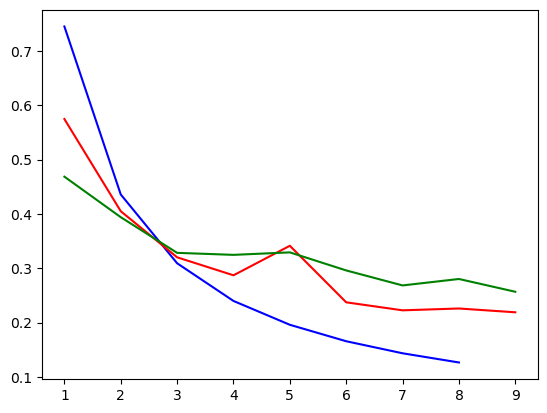

In [94]:
plt.plot(x_bedford, y_bedford_norm, color="blue")
plt.plot(x_alg_preco, y_alg_preco_norm, color="red")
plt.plot(x_alg_volume, y_alg_volume_norm, color="green")
plt.show()